<a href="https://colab.research.google.com/github/faridqamar/CISC683_paper/blob/master/kmeans_vs_kmedians.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist
from scipy import stats

!pip install -q sklearn_extensions
from sklearn_extensions.fuzzy_kmeans import KMedians

import time

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [0]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

kmeans error =  1833.7498068627597
kmedians error =  1834.1330241387686


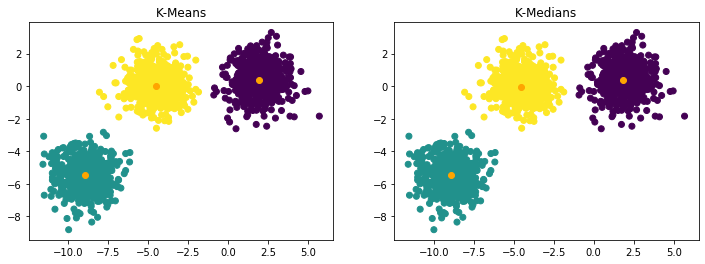

In [0]:
# Correct example

y_pred_kmeans = KMeans(n_clusters=3, random_state=random_state).fit(X)
kmeans = y_pred_kmeans.predict(X)

y_pred_kmedians = KMedians(k=3, random_state=random_state).fit(X)
kmedians = y_pred_kmedians.labels_ - 1
kmedians = np.where(kmedians==-1, 2, kmedians) 

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=kmeans)
plt.plot(y_pred_kmeans.cluster_centers_[:,0], y_pred_kmeans.cluster_centers_[:,1], 'o', color='orange')
plt.title("K-Means")

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=kmedians)
plt.plot(y_pred_kmedians.cluster_centers_[:,0], y_pred_kmedians.cluster_centers_[:,1], 'o', color='orange')
plt.title("K-Medians")

kmeans_error = 0.0
kmedians_error = 0.0
for i in range(0, X.shape[0]):
  kmeans_mindist = np.min(cdist(np.array([X[i,:]]), y_pred_kmeans.cluster_centers_, 'euclidean'))
  kmedians_mindist = np.min(cdist(np.array([X[i,:]]), y_pred_kmedians.cluster_centers_, 'euclidean'))
  kmeans_error += kmeans_mindist
  kmedians_error += kmedians_mindist

print("kmeans error = ", kmeans_error)
print("kmedians error = ", kmedians_error)

In [0]:
# t-test (20 times)
kmeans_errors = []
kmedians_errors = []
ntrials = 20

for ntrial in range(0,ntrials):
  X, y = make_blobs(n_samples=n_samples, random_state=ntrial*10)

  y_pred_kmeans = KMeans(n_clusters=3, random_state=ntrial).fit(X)
  kmeans = y_pred_kmeans.predict(X)

  y_pred_kmedians = KMedians(k=3, random_state=ntrial).fit(X)
  kmedians = y_pred_kmedians.labels_ - 1
  kmedians = np.where(kmedians==-1, 2, kmedians) 

  kmeans_error = 0.0
  kmedians_error = 0.0
  for i in range(0, X.shape[0]):
    kmeans_mindist = np.min(cdist(np.array([X[i,:]]), y_pred_kmeans.cluster_centers_, 'euclidean'))
    kmedians_mindist = np.min(cdist(np.array([X[i,:]]), y_pred_kmedians.cluster_centers_, 'euclidean'))
    kmeans_error += kmeans_mindist
    kmedians_error += kmedians_mindist
  
  kmeans_errors.append(kmeans_error)
  kmedians_errors.append(kmedians_error)

print("kmeans errors = ", kmeans_errors)
print("kmedians errors = ", kmedians_errors)

kmeans_mean = np.mean(kmeans_errors)
kmedians_mean = np.mean(kmedians_errors)
print(kmeans_mean)
print(kmedians_mean)

sum_diff_2 = []
for ntrial in range(0, ntrials):
  sum_diff = (kmedians_errors[ntrial] - kmeans_errors[ntrial]) - (kmedians_mean - kmeans_mean)
  sum_diff_2.append(sum_diff*sum_diff)
variance = np.sum(sum_diff_2) / (ntrials-1)
t_stat = (kmedians_mean - kmeans_mean) / math.sqrt(variance/ntrials)
print("t-stat ", t_stat)

kmeans errors =  [1743.1457728131124, 1842.6293518941716, 1862.4834630306889, 1849.1864662113474, 1855.7890637120747, 1881.2161953426873, 1889.3377859927461, 1878.827998085245, 1874.201826648358, 1823.6728664773211, 1897.8268854636658, 1829.8659528451012, 1702.0618570003257, 1880.1677140216564, 1649.2226039184027, 1905.7030565642995, 1909.946903517334, 1833.7498068627597, 1850.4407845481778, 1751.641237970031]
kmedians errors =  [1742.6560589340409, 4063.225794658299, 1862.3871973803925, 1849.3214353257308, 1855.7145240369393, 1880.7758244805857, 1889.7460188514797, 1878.9306582742558, 3250.7624221148094, 1823.4121771932578, 1897.58767884337, 1829.6135341585266, 1698.9442619107092, 8215.042276059386, 1651.6004737674546, 1905.5718990299767, 1910.266409233072, 1834.1330241387686, 1850.0688088576544, 1750.7344562641763]
1835.5558796459754
2332.0247466756446
t-stat  1.4928619660216131


kmeans error =  1461.7880404766743
kmedians error =  1484.476554521465


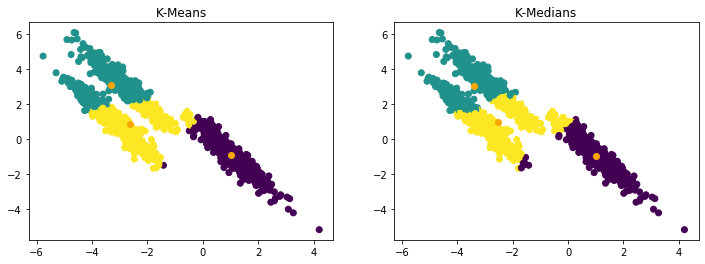

In [0]:
# Anisotropicly distributed data

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

y_pred_kmeans = KMeans(n_clusters=3, random_state=random_state).fit(X_aniso)
kmeans = y_pred_kmeans.predict(X_aniso)

y_pred_kmedians = KMedians(k=3, random_state=random_state).fit(X_aniso)
kmedians = 2 - y_pred_kmedians.labels_

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=kmeans)
plt.plot(y_pred_kmeans.cluster_centers_[:,0], y_pred_kmeans.cluster_centers_[:,1], 'o', color='orange')
plt.title("K-Means")

plt.subplot(122)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=kmedians)
plt.plot(y_pred_kmedians.cluster_centers_[:,0], y_pred_kmedians.cluster_centers_[:,1], 'o', color='orange')
plt.title("K-Medians")

kmeans_error = 0.0
kmedians_error = 0.0
for i in range(0, X_aniso.shape[0]):
  kmeans_mindist = np.min(cdist(np.array([X_aniso[i,:]]), y_pred_kmeans.cluster_centers_, 'euclidean'))
  kmedians_mindist = np.min(cdist(np.array([X_aniso[i,:]]), y_pred_kmedians.cluster_centers_, 'euclidean'))
  kmeans_error += kmeans_mindist
  kmedians_error += kmedians_mindist

print("kmeans error = ", kmeans_error)
print("kmedians error = ", kmedians_error)

In [0]:
# t-test (20 times)
kmeans_errors = []
kmedians_errors = []
ntrials = 20

for ntrial in range(0,ntrials):
  X, y = make_blobs(n_samples=n_samples, random_state=ntrial*10)
  transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
  X_aniso = np.dot(X, transformation)

  y_pred_kmeans = KMeans(n_clusters=3, random_state=ntrial).fit(X_aniso)
  kmeans = y_pred_kmeans.predict(X_aniso)

  y_pred_kmedians = KMedians(k=3, random_state=ntrial).fit(X_aniso)
  kmedians = 2 - y_pred_kmedians.labels_ 

  kmeans_error = 0.0
  kmedians_error = 0.0
  for i in range(0, X_aniso.shape[0]):
    kmeans_mindist = np.min(cdist(np.array([X_aniso[i,:]]), y_pred_kmeans.cluster_centers_, 'euclidean'))
    kmedians_mindist = np.min(cdist(np.array([X_aniso[i,:]]), y_pred_kmedians.cluster_centers_, 'euclidean'))
    kmeans_error += kmeans_mindist
    kmedians_error += kmedians_mindist
  
  kmeans_errors.append(kmeans_error)
  kmedians_errors.append(kmedians_error)

print("kmeans errors = ", kmeans_errors)
print("kmedians errors = ", kmedians_errors)

kmeans_mean = np.mean(kmeans_errors)
kmedians_mean = np.mean(kmedians_errors)
print(kmeans_mean)
print(kmedians_mean)

sum_diff_2 = []
for ntrial in range(0, ntrials):
  sum_diff = (kmedians_errors[ntrial] - kmeans_errors[ntrial]) - (kmedians_mean - kmeans_mean)
  sum_diff_2.append(sum_diff*sum_diff)
variance = np.sum(sum_diff_2) / (ntrials-1)
t_stat = (kmedians_mean - kmeans_mean) / math.sqrt(variance/ntrials)
print("t-stat ", t_stat)

kmeans errors =  [1151.66048667843, 1576.850048495255, 1581.2652614838237, 1428.4990886909775, 1440.3709308979933, 1562.0455656178794, 1498.3119984426178, 1571.5158159493274, 1526.084338822096, 1313.6788465165926, 1587.5142962707587, 1505.316195351328, 1187.439475129064, 1559.2509816314127, 1176.122831608545, 1428.9703069702373, 1598.3846802603944, 1461.9165550400046, 1299.4262878783297, 1131.4943186933594]
kmedians errors =  [1145.3821298210642, 1577.1357987211557, 1581.54657527659, 1426.1943885404949, 1441.5838506190316, 1560.8004795381357, 1490.7640332379465, 1570.0043646085194, 2384.49300166473, 1302.3015539666885, 1585.9107801571981, 1503.9963916551594, 1179.0209881676933, 1558.3280659628433, 1169.260484040025, 1440.3850104346027, 1599.360857630183, 1720.9156681604618, 1287.984373023456, 1126.46704196973]
1429.3059155214212
1482.5917918597856
t-stat  1.2011841570998394


kmeans error =  2313.837917934984
kmedians error =  2294.887943455557


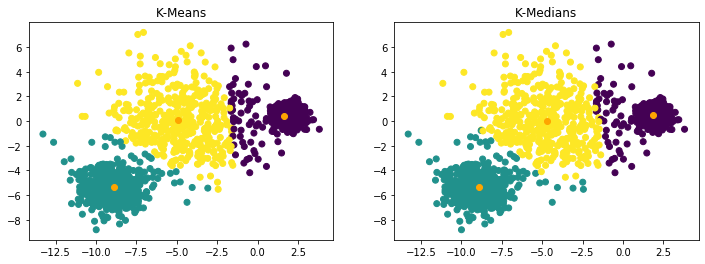

In [0]:
# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)

y_pred_kmeans = KMeans(n_clusters=3, random_state=random_state).fit(X_varied)
kmeans = y_pred_kmeans.predict(X_varied)

y_pred_kmedians = KMedians(k=3, random_state=random_state).fit(X_varied)
kmedians = y_pred_kmedians.labels_ - 1
kmedians = np.where(kmedians==-1, 2, kmedians)

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=kmeans)
plt.plot(y_pred_kmeans.cluster_centers_[:,0], y_pred_kmeans.cluster_centers_[:,1], 'o', color='orange')
plt.title("K-Means")

plt.subplot(122)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=kmedians)
plt.plot(y_pred_kmedians.cluster_centers_[:,0], y_pred_kmedians.cluster_centers_[:,1], 'o', color='orange')
plt.title("K-Medians")

kmeans_error = 0.0
kmedians_error = 0.0
for i in range(0, X_varied.shape[0]):
  kmeans_mindist = np.min(cdist(np.array([X_varied[i,:]]), y_pred_kmeans.cluster_centers_, 'euclidean'))
  kmedians_mindist = np.min(cdist(np.array([X_varied[i,:]]), y_pred_kmedians.cluster_centers_, 'euclidean'))
  kmeans_error += kmeans_mindist
  kmedians_error += kmedians_mindist

print("kmeans error = ", kmeans_error)
print("kmedians error = ", kmedians_error)

In [0]:
# t-test (20 times)
kmeans_errors = []
kmedians_errors = []
ntrials = 20

for ntrial in range(0,ntrials):
  X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=ntrial*10)

  y_pred_kmeans = KMeans(n_clusters=3, random_state=ntrial).fit(X_varied)
  kmeans = y_pred_kmeans.predict(X_varied)

  y_pred_kmedians = KMedians(k=3, random_state=ntrial).fit(X_varied)
  kmedians = y_pred_kmedians.labels_ - 1
  kmedians = np.where(kmedians==-1, 2, kmedians) 

  kmeans_error = 0.0
  kmedians_error = 0.0
  for i in range(0, X_varied.shape[0]):
    kmeans_mindist = np.min(cdist(np.array([X_varied[i,:]]), y_pred_kmeans.cluster_centers_, 'euclidean'))
    kmedians_mindist = np.min(cdist(np.array([X_varied[i,:]]), y_pred_kmedians.cluster_centers_, 'euclidean'))
    kmeans_error += kmeans_mindist
    kmedians_error += kmedians_mindist
  
  kmeans_errors.append(kmeans_error)
  kmedians_errors.append(kmedians_error)

print("kmeans errors = ", kmeans_errors)
print("kmedians errors = ", kmedians_errors)

kmeans_mean = np.mean(kmeans_errors)
kmedians_mean = np.mean(kmedians_errors)
print(kmeans_mean)
print(kmedians_mean)

sum_diff_2 = []
for ntrial in range(0, ntrials):
  sum_diff = (kmedians_errors[ntrial] - kmeans_errors[ntrial]) - (kmedians_mean - kmeans_mean)
  sum_diff_2.append(sum_diff*sum_diff)
variance = np.sum(sum_diff_2) / (ntrials-1)
t_stat = (kmedians_mean - kmeans_mean) / math.sqrt(variance/ntrials)
print("t-stat ", t_stat)

kmeans errors =  [2071.5410194485175, 2465.530203051142, 2442.172512543154, 2220.1815056885616, 2352.676091928375, 2418.09842722883, 2433.8084798191935, 2434.5516931279462, 2328.944006173381, 2730.6648694654036, 2528.2626512106817, 2196.657008564983, 2177.2030536956345, 2471.018285994616, 2284.5548587874773, 2414.9522327563545, 2489.971813330868, 2313.837917934984, 2234.6578318787533, 2069.1844033333737]
kmedians errors =  [2060.538757810173, 4756.150538054447, 2436.216234450309, 2211.358000443251, 2347.821361883455, 2413.4736011572636, 2426.3746661783002, 2429.24437147023, 3473.829614518368, 2530.8631330484654, 2527.0078845693997, 2188.562843628094, 2184.1218043638137, 2469.364226663319, 2290.119566526917, 2393.0845275498164, 2482.861074265615, 2294.9231499813804, 2233.192405213464, 2059.9123875694095]
2353.9234432981116
2510.451007467275
t-stat  1.2345089076891655


kmeans error =  766.7295802916801
kmedians error =  695.2416560508902


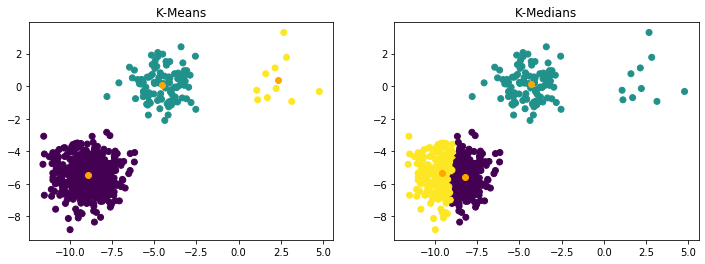

In [0]:
# Unevenly sized blobs k=3
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))

y_pred_kmeans = KMeans(n_clusters=3, random_state=random_state).fit(X_filtered)
kmeans = y_pred_kmeans.predict(X_filtered)

y_pred_kmedians = KMedians(k=3, random_state=random_state).fit(X_filtered)
kmedians = y_pred_kmedians.labels_

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=kmeans)
plt.plot(y_pred_kmeans.cluster_centers_[:,0], y_pred_kmeans.cluster_centers_[:,1], 'o', color='orange')
plt.title("K-Means")

plt.subplot(122)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=kmedians)
plt.plot(y_pred_kmedians.cluster_centers_[:,0], y_pred_kmedians.cluster_centers_[:,1], 'o', color='orange')
plt.title("K-Medians")

kmeans_error = 0.0
kmedians_error = 0.0
for i in range(0, X_filtered.shape[0]):
  kmeans_mindist = np.min(cdist(np.array([X_filtered[i,:]]), y_pred_kmeans.cluster_centers_, 'euclidean'))
  kmedians_mindist = np.min(cdist(np.array([X_filtered[i,:]]), y_pred_kmedians.cluster_centers_, 'euclidean'))
  kmeans_error += kmeans_mindist
  kmedians_error += kmedians_mindist

print("kmeans error = ", kmeans_error)
print("kmedians error = ", kmedians_error)

In [0]:
# t-test (20 times)
kmeans_errors = []
kmedians_errors = []
ntrials = 20

for ntrial in range(0,ntrials):
  X, y = make_blobs(n_samples=n_samples, random_state=ntrial*10)
  X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))

  y_pred_kmeans = KMeans(n_clusters=3, random_state=ntrial).fit(X_filtered)
  kmeans = y_pred_kmeans.predict(X_filtered)

  y_pred_kmedians = KMedians(k=3, random_state=ntrial).fit(X_filtered)
  kmedians = y_pred_kmedians.labels_

  kmeans_error = 0.0
  kmedians_error = 0.0
  for i in range(0, X_filtered.shape[0]):
    kmeans_mindist = np.min(cdist(np.array([X_filtered[i,:]]), y_pred_kmeans.cluster_centers_, 'euclidean'))
    kmedians_mindist = np.min(cdist(np.array([X_filtered[i,:]]), y_pred_kmedians.cluster_centers_, 'euclidean'))
    kmeans_error += kmeans_mindist
    kmedians_error += kmedians_mindist
  
  kmeans_errors.append(kmeans_error)
  kmedians_errors.append(kmedians_error)

print("kmeans errors = ", kmeans_errors)
print("kmedians errors = ", kmedians_errors)

kmeans_mean = np.mean(kmeans_errors)
kmedians_mean = np.mean(kmedians_errors)
print(kmeans_mean)
print(kmedians_mean)

sum_diff_2 = []
for ntrial in range(0, ntrials):
  sum_diff = (kmeans_errors[ntrial] - kmedians_errors[ntrial]) - (kmeans_mean - kmedians_mean)
  sum_diff_2.append(sum_diff*sum_diff)
variance = np.sum(sum_diff_2) / (ntrials-1)
t_stat = (kmeans_mean - kmedians_mean) / math.sqrt(variance/ntrials)
print("t-stat ", t_stat)

kmeans errors =  [612.9417480284937, 722.9123452494943, 750.1572208557809, 692.2234714048478, 672.3461484155715, 773.6496472723037, 696.3683701485775, 779.0789328846788, 769.0850496776611, 679.3276624512798, 787.9697845456775, 662.0246914278168, 646.4305394313876, 737.8698040389812, 631.968847481814, 692.2871589791012, 775.0172333667615, 766.7295802916801, 729.7605365465395, 605.9858201173271]
kmedians errors =  [614.6220146860677, 663.3814061736306, 729.7877320134979, 675.4991090502015, 671.4511218322926, 760.027707506598, 708.6205376346297, 804.2801457881867, 703.3037206074505, 677.6811845390655, 758.5125385682618, 673.4228042955089, 614.1036407927112, 756.6346164042675, 632.4758097298804, 689.192346697611, 813.492075790551, 694.8955398690355, 676.2093026842042, 599.6370232857911]
709.2067296307887
695.8615188974723
t-stat  1.9425753067628557


kmeans error =  825.4122921438056
kmedians error =  820.4849177600681


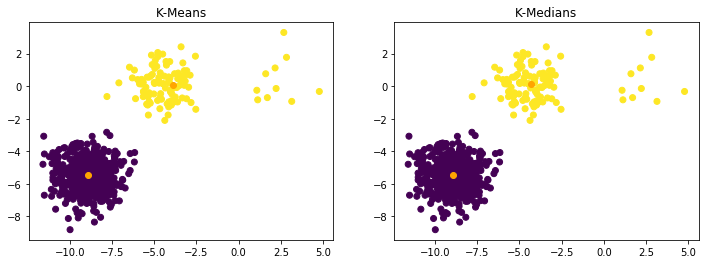

In [0]:
# Unevenly sized blobs k=2
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))

y_pred_kmeans = KMeans(n_clusters=2, random_state=random_state).fit(X_filtered)
kmeans = y_pred_kmeans.predict(X_filtered)

y_pred_kmedians = KMedians(k=2, random_state=random_state).fit(X_filtered)
kmedians = y_pred_kmedians.labels_

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=kmeans)
plt.plot(y_pred_kmeans.cluster_centers_[:,0], y_pred_kmeans.cluster_centers_[:,1], 'o', color='orange')
plt.title("K-Means")

plt.subplot(122)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=kmedians)
plt.plot(y_pred_kmedians.cluster_centers_[:,0], y_pred_kmedians.cluster_centers_[:,1], 'o', color='orange')
plt.title("K-Medians")

kmeans_error = 0.0
kmedians_error = 0.0
for i in range(0, X_filtered.shape[0]):
  kmeans_mindist = np.min(cdist(np.array([X_filtered[i,:]]), y_pred_kmeans.cluster_centers_, 'euclidean'))
  kmedians_mindist = np.min(cdist(np.array([X_filtered[i,:]]), y_pred_kmedians.cluster_centers_, 'euclidean'))
  kmeans_error += kmeans_mindist
  kmedians_error += kmedians_mindist

print("kmeans error = ", kmeans_error)
print("kmedians error = ", kmedians_error)

In [0]:
# t-test (20 times)
kmeans_errors = []
kmedians_errors = []
ntrials = 20

for ntrial in range(0,ntrials):
  X, y = make_blobs(n_samples=n_samples, random_state=ntrial*10)
  X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))

  y_pred_kmeans = KMeans(n_clusters=2, random_state=ntrial).fit(X_filtered)
  kmeans = y_pred_kmeans.predict(X_filtered)

  y_pred_kmedians = KMedians(k=2, random_state=ntrial).fit(X_filtered)
  kmedians = y_pred_kmedians.labels_

  kmeans_error = 0.0
  kmedians_error = 0.0
  for i in range(0, X_filtered.shape[0]):
    kmeans_mindist = np.min(cdist(np.array([X_filtered[i,:]]), y_pred_kmeans.cluster_centers_, 'euclidean'))
    kmedians_mindist = np.min(cdist(np.array([X_filtered[i,:]]), y_pred_kmedians.cluster_centers_, 'euclidean'))
    kmeans_error += kmeans_mindist
    kmedians_error += kmedians_mindist
  
  kmeans_errors.append(kmeans_error)
  kmedians_errors.append(kmedians_error)

print("kmeans errors = ", kmeans_errors)
print("kmedians errors = ", kmedians_errors)

kmeans_mean = np.mean(kmeans_errors)
kmedians_mean = np.mean(kmedians_errors)
print(kmeans_mean)
print(kmedians_mean)

sum_diff_2 = []
for ntrial in range(0, ntrials):
  sum_diff = (kmedians_errors[ntrial] - kmeans_errors[ntrial]) - (kmedians_mean - kmeans_mean)
  sum_diff_2.append(sum_diff*sum_diff)
variance = np.sum(sum_diff_2) / (ntrials-1)
t_stat = (kmedians_mean - kmeans_mean) / math.sqrt(variance/ntrials)
print("t-stat ", t_stat)

kmeans errors =  [739.9702306676974, 779.7611522560858, 864.1802809513076, 798.0545891540588, 796.7469567997404, 906.944177815814, 826.5334189694581, 962.7484215768418, 830.245014598028, 814.5770294117765, 892.5731615077748, 787.958892051104, 806.7926881608246, 883.02178986555, 747.3566039403343, 816.3034605435407, 862.8724314907566, 825.4122921438056, 801.267217960743, 711.4854367518633]
kmedians errors =  [739.6067248985333, 778.922229437784, 858.9385801451149, 794.1783397937493, 795.8869632302649, 882.1785545902206, 822.0918896965835, 1313.3357064816805, 828.5037400876903, 814.8142780725817, 888.0442009982047, 781.4701004786724, 724.3819768160823, 873.4262335952748, 747.533038005301, 816.1375874129869, 847.747279928569, 820.4849177600681, 791.2191913757423, 713.3037490271038]
822.7402623308553
831.6102640916104
t-stat  0.4808169368907328


kmeans error =  4405.905468900353
kmedians error =  2574.576623879341


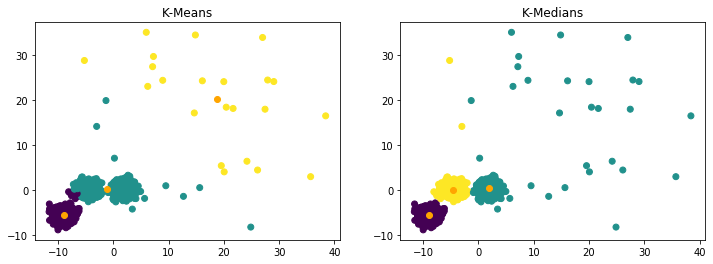

In [0]:
# Outliers
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
np.random.seed(10)
outliers = 40 * np.random.random_sample((30, 2)) - 10 * np.random.random_sample((30, 2))
X_outliers = np.append(X, outliers, axis=0)

y_pred_kmeans = KMeans(n_clusters=3, random_state=random_state).fit(X_outliers)
kmeans = y_pred_kmeans.predict(X_outliers)

y_pred_kmedians = KMedians(k=3, random_state=random_state).fit(X_outliers)
kmedians = y_pred_kmedians.labels_

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c=kmeans)
plt.plot(y_pred_kmeans.cluster_centers_[:,0], y_pred_kmeans.cluster_centers_[:,1], 'o', color='orange')
plt.title("K-Means")

plt.subplot(122)
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c=kmedians)
plt.plot(y_pred_kmedians.cluster_centers_[:,0], y_pred_kmedians.cluster_centers_[:,1], 'o', color='orange')
plt.title("K-Medians")

kmeans_error = 0.0
kmedians_error = 0.0
for i in range(0, X_outliers.shape[0]):
  kmeans_mindist = np.min(cdist(np.array([X_outliers[i,:]]), y_pred_kmeans.cluster_centers_, 'euclidean'))
  kmedians_mindist = np.min(cdist(np.array([X_outliers[i,:]]), y_pred_kmedians.cluster_centers_, 'euclidean'))
  kmeans_error += kmeans_mindist
  kmedians_error += kmedians_mindist

print("kmeans error = ", kmeans_error)
print("kmedians error = ", kmedians_error)

In [0]:
# t-test (20 times)
kmeans_errors = []
kmedians_errors = []
ntrials = 20

for ntrial in range(0,ntrials):
  X, y = make_blobs(n_samples=n_samples, random_state=ntrial*10)
  np.random.seed(ntrial)
  outliers = 40 * np.random.random_sample((30, 2)) - 10 * np.random.random_sample((30, 2))
  X_outliers = np.append(X, outliers, axis=0)

  y_pred_kmeans = KMeans(n_clusters=3, random_state=ntrial).fit(X_outliers)
  kmeans = y_pred_kmeans.predict(X_outliers)

  y_pred_kmedians = KMedians(k=3, random_state=ntrial).fit(X_outliers)
  kmedians = y_pred_kmedians.labels_

  kmeans_error = 0.0
  kmedians_error = 0.0
  for i in range(0, X_outliers.shape[0]):
    kmeans_mindist = np.min(cdist(np.array([X_outliers[i,:]]), y_pred_kmeans.cluster_centers_, 'euclidean'))
    kmedians_mindist = np.min(cdist(np.array([X_outliers[i,:]]), y_pred_kmedians.cluster_centers_, 'euclidean'))
    kmeans_error += kmeans_mindist
    kmedians_error += kmedians_mindist
  
  kmeans_errors.append(kmeans_error)
  kmedians_errors.append(kmedians_error)

print("kmeans errors = ", kmeans_errors)
print("kmedians errors = ", kmedians_errors)

kmeans_mean = np.mean(kmeans_errors)
kmedians_mean = np.mean(kmedians_errors)
print(kmeans_mean)
print(kmedians_mean)

sum_diff_2 = []
for ntrial in range(0, ntrials):
  sum_diff = (kmeans_errors[ntrial] - kmedians_errors[ntrial]) - (kmeans_mean - kmedians_mean)
  sum_diff_2.append(sum_diff*sum_diff)
variance = np.sum(sum_diff_2) / (ntrials-1)
t_stat = (kmeans_mean - kmedians_mean) / math.sqrt(variance/ntrials)
print("t-stat ", t_stat)

kmeans errors =  [2697.8055490133283, 2466.770974570997, 2326.6337159519244, 3386.360756721469, 3757.023901145737, 4070.7619681475485, 4591.147549295433, 2390.2067630359893, 3724.523267102414, 2655.1420925878497, 2714.679872865181, 3759.1531369426402, 2403.6751115151246, 2586.298173818769, 2324.0055992064417, 2418.247899356045, 2503.1569910608096, 2633.18891428416, 3209.58933733122, 2648.3396400286692]
kmedians errors =  [2408.417036694783, 2392.1326442541467, 4320.269405506202, 2448.098972293776, 2594.900887964198, 2485.1663285705113, 2677.4245960280523, 2349.0757066023148, 2400.434951960841, 2376.5354935032715, 2585.0880967807707, 2389.3159066440344, 2239.485951466239, 5844.881983935519, 2447.5927911682934, 4128.001679822474, 5536.029748619186, 2490.061416321751, 2495.2761423965185, 2338.5572563833975]
2963.335560699088
2947.337349845814
t-stat  0.049557750680446364


kmeans error =  906.7820656667661
kmedians error =  915.9808205589768


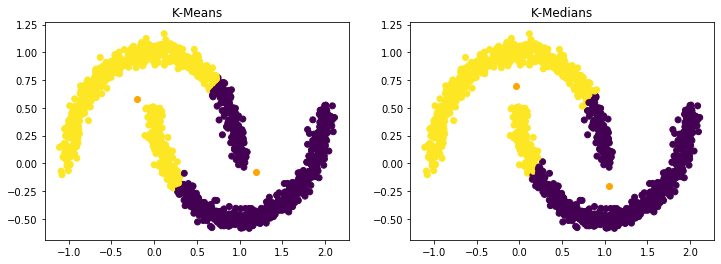

In [0]:
# moon
from sklearn import datasets
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X_moons, y_moons = (noisy_moons)

y_pred_kmeans = KMeans(n_clusters=2, random_state=random_state).fit(X_moons)
kmeans = y_pred_kmeans.predict(X_moons)

y_pred_kmedians = KMedians(k=2, random_state=random_state).fit(X_moons)
kmedians = y_pred_kmedians.labels_

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=kmeans)
plt.plot(y_pred_kmeans.cluster_centers_[:,0], y_pred_kmeans.cluster_centers_[:,1], 'o', color='orange')
plt.title("K-Means")

plt.subplot(122)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=kmedians)
plt.plot(y_pred_kmedians.cluster_centers_[:,0], y_pred_kmedians.cluster_centers_[:,1], 'o', color='orange')
plt.title("K-Medians")

kmeans_error = 0.0
kmedians_error = 0.0
for i in range(0, X_moons.shape[0]):
  kmeans_mindist = np.min(cdist(np.array([X_moons[i,:]]), y_pred_kmeans.cluster_centers_, 'euclidean'))
  kmedians_mindist = np.min(cdist(np.array([X_moons[i,:]]), y_pred_kmedians.cluster_centers_, 'euclidean'))
  kmeans_error += kmeans_mindist
  kmedians_error += kmedians_mindist

print("kmeans error = ", kmeans_error)
print("kmedians error = ", kmedians_error)

In [0]:
# t-test (20 times)
kmeans_errors = []
kmedians_errors = []
ntrials = 20

for ntrial in range(0,ntrials):
  noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
  X_moons, y_moons = (noisy_moons)

  y_pred_kmeans = KMeans(n_clusters=2, random_state=ntrial).fit(X_moons)
  kmeans = y_pred_kmeans.predict(X_moons)

  y_pred_kmedians = KMedians(k=2, random_state=ntrial).fit(X_moons)
  kmedians = y_pred_kmedians.labels_

  kmeans_error = 0.0
  kmedians_error = 0.0
  for i in range(0, X_moons.shape[0]):
    kmeans_mindist = np.min(cdist(np.array([X_moons[i,:]]), y_pred_kmeans.cluster_centers_, 'euclidean'))
    kmedians_mindist = np.min(cdist(np.array([X_moons[i,:]]), y_pred_kmedians.cluster_centers_, 'euclidean'))
    kmeans_error += kmeans_mindist
    kmedians_error += kmedians_mindist
  
  kmeans_errors.append(kmeans_error)
  kmedians_errors.append(kmedians_error)

print("kmeans errors = ", kmeans_errors)
print("kmedians errors = ", kmedians_errors)

kmeans_mean = np.mean(kmeans_errors)
kmedians_mean = np.mean(kmedians_errors)
print(kmeans_mean)
print(kmedians_mean)

sum_diff_2 = []
for ntrial in range(0, ntrials):
  sum_diff = (kmedians_errors[ntrial] - kmeans_errors[ntrial]) - (kmedians_mean - kmeans_mean)
  sum_diff_2.append(sum_diff*sum_diff)
variance = np.sum(sum_diff_2) / (ntrials-1)
t_stat = (kmedians_mean - kmeans_mean) / math.sqrt(variance/ntrials)
print("t-stat ", t_stat)

kmeans errors =  [904.8252777464835, 902.7516215816172, 902.9127139699601, 906.9751133264703, 903.8090187168223, 904.5814534840134, 903.256153183574, 908.0574707658662, 905.2416100796066, 906.2295571946868, 902.966243564859, 905.0225342666713, 904.4423413333177, 903.8870611252233, 906.0740282563676, 906.3252419771937, 903.7922902864059, 902.8891231217491, 901.974109151673, 902.5172181272898]
kmedians errors =  [914.646434986779, 912.8959708080926, 913.8329159603142, 917.4165655030565, 913.7194178805961, 913.5206834768692, 911.7040349349983, 918.7898035971259, 913.2789542191521, 917.5585823999411, 913.2970222397232, 915.8726248481595, 914.6041466855538, 913.6542507920445, 916.3799051437755, 915.4825837211667, 913.8508231097251, 912.3405331910496, 911.6460976489634, 910.2545259367922]
904.4265090629926
914.2372938541939
t-stat  45.94954294565158
